In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define the input features (X) and target variable (y)
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])

In [ ]:
print(X) # (4,3)
print(y) # (4,1)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]]


In [ ]:
# Define the sigmoid activation function
def sigmoid(z):
  return 1/(1+np.exp(-z))

# Define the derivative of the sigmoid function
def sigmoid_prime(z):
  return np.multiply(sigmoid(z),(1-sigmoid(z)))

# Define the mean squared error loss function
def mse_loss(y_true,y_pred):
  return np.mean(np.square(y_true - y_pred))

def accuracy(y_true, y_pred):
  y_pred = (y_pred > 0.5).astype(int)
  return np.mean(y_true == y_pred)

In [ ]:
# Define the neural network class
class NeuralNetwork:
  def __init__(self, X,y,neuron_size,learning_rate):
    self.X = X
    self.y = y
    self.neuron_size = neuron_size
    self.learning_rate = learning_rate
    self.weights_layer1 = np.random.rand(self.X.shape[1],self.neuron_size) # (3,neurons)
    self.weights_layer2 = np.random.rand(self.neuron_size,1) # (neurons,1)
    self.output = np.zeros(self.y.shape)

  def forward_propagate(self):
    self.layer1 = sigmoid(np.dot(self.X,self.weights_layer1)) # (4,neurons) output of hidden layer
    # print('Layer1: \n', self.layer1)
    self.output = sigmoid(np.dot(self.layer1,self.weights_layer2)) # (4,1) output layer (predicted value)
    #print('y_pred: \n', self.output)
    return self.output

  def back_propagate(self):
    self.output_error = (self.y - self.output)
    output_delta = np.multiply(self.output_error,sigmoid_prime(self.output))

    hidden_error = np.dot(output_delta,self.weights_layer2.T)
    hidden_delta = np.multiply(hidden_error, sigmoid_prime(self.layer1))

    d_weight_layer2 = np.dot(self.layer1.T,output_delta)
    d_weight_layer1 = np.dot(self.X.T,hidden_delta)

    self.weights_layer2 += self.learning_rate * d_weight_layer2
    self.weights_layer1 += self.learning_rate * d_weight_layer1


In [ ]:
# Initialize the neural network with 4 neurons in the hidden layer and a learning rate of 0.4
nn = NeuralNetwork(X, y, 4, 0.4)
losses = []
accuracies = []
epochs = 20000

# Training loop
for i in range(epochs):
    nn.forward_propagate()
    nn.back_propagate()
    loss = mse_loss(nn.y, nn.output)
    acc = accuracy(nn.y, nn.output)
    losses.append(loss)
    accuracies.append(acc)

# Print the final loss and accuracy
print('Final Loss:', losses[-1])
print('Final Accuracy:', accuracies[-1])

print('Predicted Output: \n',nn.output)


Final Loss: 0.00012894323001333018
Final Accuracy: 1.0
Predicted Output: 
 [[0.00929893]
 [0.98869444]
 [0.98611541]
 [0.01042619]]


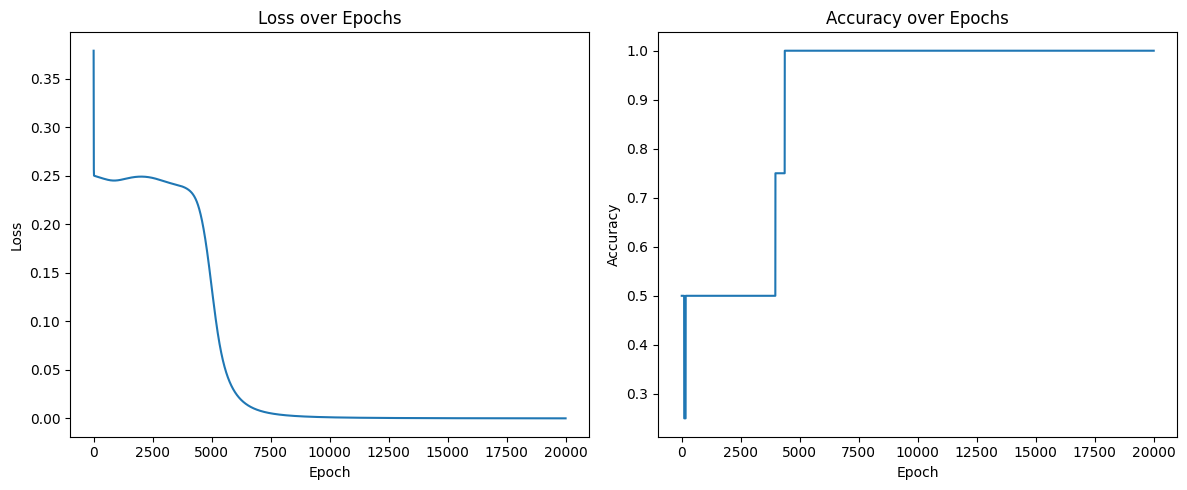

In [ ]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")

plt.tight_layout()
plt.show()


The neural network successfully learned the XOR function, as evidenced by the rapid decrease in loss and the corresponding increase in accuracy. Initially, the loss fluctuates, likely due to the relatively high learning rate (0.4), but after approximately 10,000 epochs, the model converges to an optimal solution with near-zero loss and perfect accuracy. The use of 4 hidden neurons appears sufficient to capture the non-linearity of the XOR problem. The network maintains a perfect accuracy of 1.0 for the remainder of the training, indicating it has fully generalized the XOR function.